The resultant X and Y are a 1,500 x 2 matrix and a 1,500 x 1 vector, respectively. Assume that X is the input matrix (two features) and Y is the output column of a two-class classification problem, respectively.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

X, Y = make_moons(n_samples=1500, shuffle=True, noise=0.12, random_state=36)

In [6]:
X

array([[-0.8253006 ,  0.82328153],
       [ 0.52089891,  0.51969712],
       [ 0.21828803, -0.045985  ],
       ...,
       [ 0.24606242,  0.00509111],
       [-0.85879545,  0.33146505],
       [-0.70633987,  0.42108816]])

In [7]:
Y

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

Design a k-means clustering function for the dataset X with the number of clusters varying from 2 to 10 and, for each number, compute the silhouette coefficient of the resultant aggregation against the ground truth vector Y.

In [11]:
from sklearn.metrics import silhouette_score

# let us now vary the number of clusters and find the best number of clusters
distortions = []
silhouette = []


# for each number of clusters in the assigned range...
for NCLUS in range(2, 11):
    km_clf = KMeans(n_clusters = NCLUS, init='random', n_init=15, max_iter=300, tol=1e-04, random_state=36)
    Y_pred = km_clf.fit_predict(X)
    distortions.append(km_clf.inertia_)
    
    # remember: silhouette coefficient can be computed in case of 2+ clusters...
    if (NCLUS>1):
        silhouette.append(silhouette_score(X, Y_pred, metric='euclidean'))

In [12]:
silhouette     # silhouette coefficient of the resultant aggregation against the ground truth vector Y.

[0.4749876117566229,
 0.4148048351673881,
 0.44573163071528143,
 0.4568214906744973,
 0.47981826098825997,
 0.4761941493575443,
 0.47372473771659346,
 0.4712304070436126,
 0.45752189593821413]

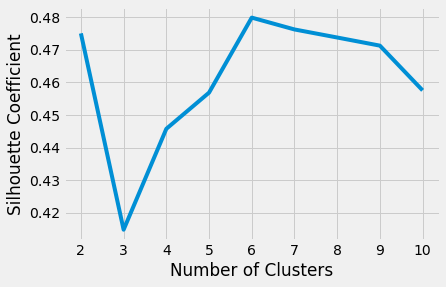

In [15]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Design a DBSCAN clustering function on X by fixing eps as 0.2 and varying parameters min_samples from 20 to 30. Calculate the silhouette coefficient of the resultant aggregations against the ground truth vector Y.

In [17]:
pca_eps_values = 0.2 
pca_min_samples = np.arange(20,31) 


silhouette = []


for p in pca_min_samples:
    
    db_clf = DBSCAN(eps=0.2, min_samples= p, metric='euclidean')
    Y_db = db_clf.fit_predict(X)
    silhouette.append(np.mean(silhouette_score(X,Y_db ,metric='euclidean')))
    

silhouette                   # silhouette coefficients
    

[-0.0014677483818944063,
 -0.0014677483818944063,
 -0.0014677483818944063,
 -0.0014677483818944063,
 0.06946561453128966,
 0.06946561453128966,
 0.06946561453128966,
 0.1488505886667965,
 0.26386477346002446,
 0.29108528805901407,
 0.29293825166893456]

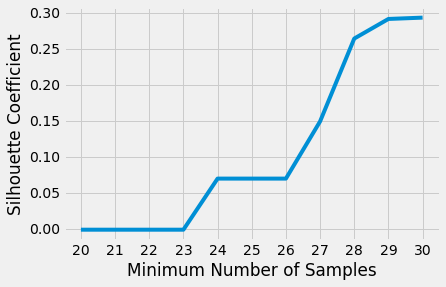

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(20, 31), silhouette)
plt.xticks(range(20, 31))
plt.xlabel("Minimum Number of Samples")
plt.ylabel("Silhouette Coefficient")
plt.show()

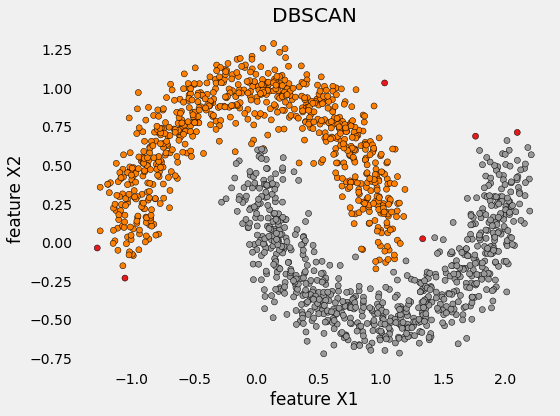

In [19]:
plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y_db, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('feature X1')
plt.ylabel('feature X2')
plt.title('DBSCAN')
plt.tight_layout()        # make square axes
plt.grid()                # add a grid
plt.show()